Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Key-Back"

position_role_stats = {
    'goal_preventing' : [
        'Defensive_Half_Pressure_Acts',
        'Pressure_Acts',
        'Spoils',
        'Tackles',
        'Clearances',
        'defensive_value',
        'exp_defensive_value'
    ],
    'ball_denial' : [
        'Rebound_50s',
        'Intercepts',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Defensive_Contest_Losses',
        'Defensive_One_On_One_Contests',
        'Ground_Ball_Gets',
        'Stoppage_Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

Games        Age  Height  \
Player          Team                   Season                             
Sam Taylor      Greater Western Sydney 2023       11  24.000000   198.0   
                                       2022       22  22.681818   196.0   
                                       2021       11  22.000000   196.0   
James Sicily    Hawthorn               2022       11  27.000000   187.0   
Harris Andrews  Brisbane Lions         2021       23  25.000000   202.0   
Nick Vlastuin   Richmond               2023       12  29.000000   187.0   
Jack Sinclair   St Kilda               2023       15  28.000000   181.0   
Nick Vlastuin   Richmond               2022       14  27.928571   187.0   
Charlie Ballard Gold Coast             2023       12  23.000000   196.0   
Adam Saad       Carlton                2022       11  27.272727   178.0   

                                               Weight  Debut_Year  \
Player          Team                   Season                       
Sam Taylor      Greater Western Sydney 2023      95.0      2018.0   
                                       2022      95.0      2018.0   
                                       2021      96.0      2018.0   
James Sicily    Hawthorn               2022      87.0      2015.0   
Harris Andrews  Brisbane Lions         2021      98.0      2015.0   
Nick Vlastuin   Richmond               2023      88.0      2013.0   
Jack Sinclair   St Kilda               2023      82.0      2015.0   
Nick Vlastuin   Richmond               2022      87.0      2013.0   
Charlie Ballard Gold Coast             2023      95.0      2018.0   
Adam Saad       Carlton                2022      77.0      2015.0   

                                               Draft_Position  \
Player          Team                   Season                   
Sam Taylor      Greater Western Sydney 2023              28.0   
                                       2022              28.0   
                                       2021              28.0   
James Sicily    Hawthorn               2022              56.0   
Harris Andrews  Brisbane Lions         2021              61.0   
Nick Vlastuin   Richmond               2023               9.0   
Jack Sinclair   St Kilda               2023               0.0   
Nick Vlastuin   Richmond               2022               9.0   
Charlie Ballard Gold Coast             2023              42.0   
Adam Saad       Carlton                2022               0.0   

                                               Pressure_Acts_sum  \
Player          Team                   Season                      
Sam Taylor      Greater Western Sydney 2023                 85.0   
                                       2022                198.0   
                                       2021                 96.0   
James Sicily    Hawthorn               2022                 80.0   
Harris Andrews  Brisbane Lions         2021                143.0   
Nick Vlastuin   Richmond               2023                113.0   
Jack Sinclair   St Kilda               2023                204.0   
Nick Vlastuin   Richmond               2022                125.0   
Charlie Ballard Gold Coast             2023                 88.0   
Adam Saad       Carlton                2022                116.0   

                                               Uncontested_Possessions_sum  \
Player          Team                   Season                                
Sam Taylor      Greater Western Sydney 2023                             62   
                                       2022                            153   
                                       2021                             89   
James Sicily    Hawthorn               2022                            159   
Harris Andrews  Brisbane Lions         2021                            202   
Nick Vlastuin   Richmond               2023                            128   
Jack Sinclair   St Kilda               2023                            235   
Nick Vlastuin   R

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

key_back_rating                      \
Season                                              2021      2022      2023   
Player            Team                                                         
Sam Taylor        Greater Western Sydney        0.894503  0.950680  1.492812   
Nick Vlastuin     Richmond                      0.000000  0.657817  0.793740   
Jack Sinclair     St Kilda                      0.000000  0.000000  0.727890   
Darcy Moore       Collingwood                   0.000000  0.317910  0.433156   
Charlie Ballard   Gold Coast                   -0.125002 -0.024913  0.588260   
Luke Ryan         Fremantle                     0.000000  0.357479  0.350366   
James Sicily      Hawthorn                      0.000000  0.829442  0.000000   
Tom Barrass       West Coast                    0.035786  0.469615  0.139544   
Sam Collins       Gold Coast                    0.492018  0.167717  0.152455   
Adam Saad         Carlton                       0.000000  0.546390  0.000000   
Harris Andrews    Brisbane Lions                0.819697 -0.104814  0.136433   
Ben McKay         North Melbourne              -0.503487  0.417970  0.000000   
Darcy Byrne-Jones Port Adelaide                 0.471645  0.000000  0.000000   
Jeremy McGovern   West Coast                    0.460508  0.000000  0.000000   
Mark Blicavs      Geelong                       0.372134  0.000000  0.000000   
Jacob Weitering   Carlton                       0.344002  0.000000  0.000000   
Liam Jones        Carlton                       0.328216  0.000000  0.000000   
Tom Stewart       Geelong                       0.304938  0.000000  0.000000   
Alex Pearce       Fremantle                     0.000000 -0.241590  0.154615   
Brennan Cox       Fremantle                     0.118664  0.000000  0.000000   

                                         overall_key_back_rating  
Season                                                            
Player            Team                                            
Sam Taylor        Greater Western Sydney                1.270341  
Nick Vlastuin     Richmond                              0.673589  
Jack Sinclair     St Kilda                              0.436734  
Darcy Moore       Collingwood                           0.355267  
Charlie Ballard   Gold Coast                            0.332982  
Luke Ryan         Fremantle                             0.317463  
James Sicily      Hawthorn                              0.248833  
Tom Barrass       West Coast                            0.228190  
Sam Collins       Gold Coast                            0.190990  
Adam Saad         Carlton                               0.163917  
Harris Andrews    Brisbane Lions                        0.132385  
Ben McKay         North Melbourne                       0.075042  
Darcy Byrne-Jones Port Adelaide                         0.047164  
Jeremy McGovern   West Coast                            0.046051  
Mark Blicavs      Geelong                               0.037213  
Jacob Weitering   Carlton                               0.034400  
Liam Jones        Carlton                               0.032822  
Tom Stewart       Geelong                               0.030494  
Alex Pearce       Fremantle                             0.020292  
Brennan Cox       Fremantle                             0.011866

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [9]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

In [9]:
player = "Nick Vlastuin"
team = "Richmond"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 50)

NameError: name 'stats_list' is not defined

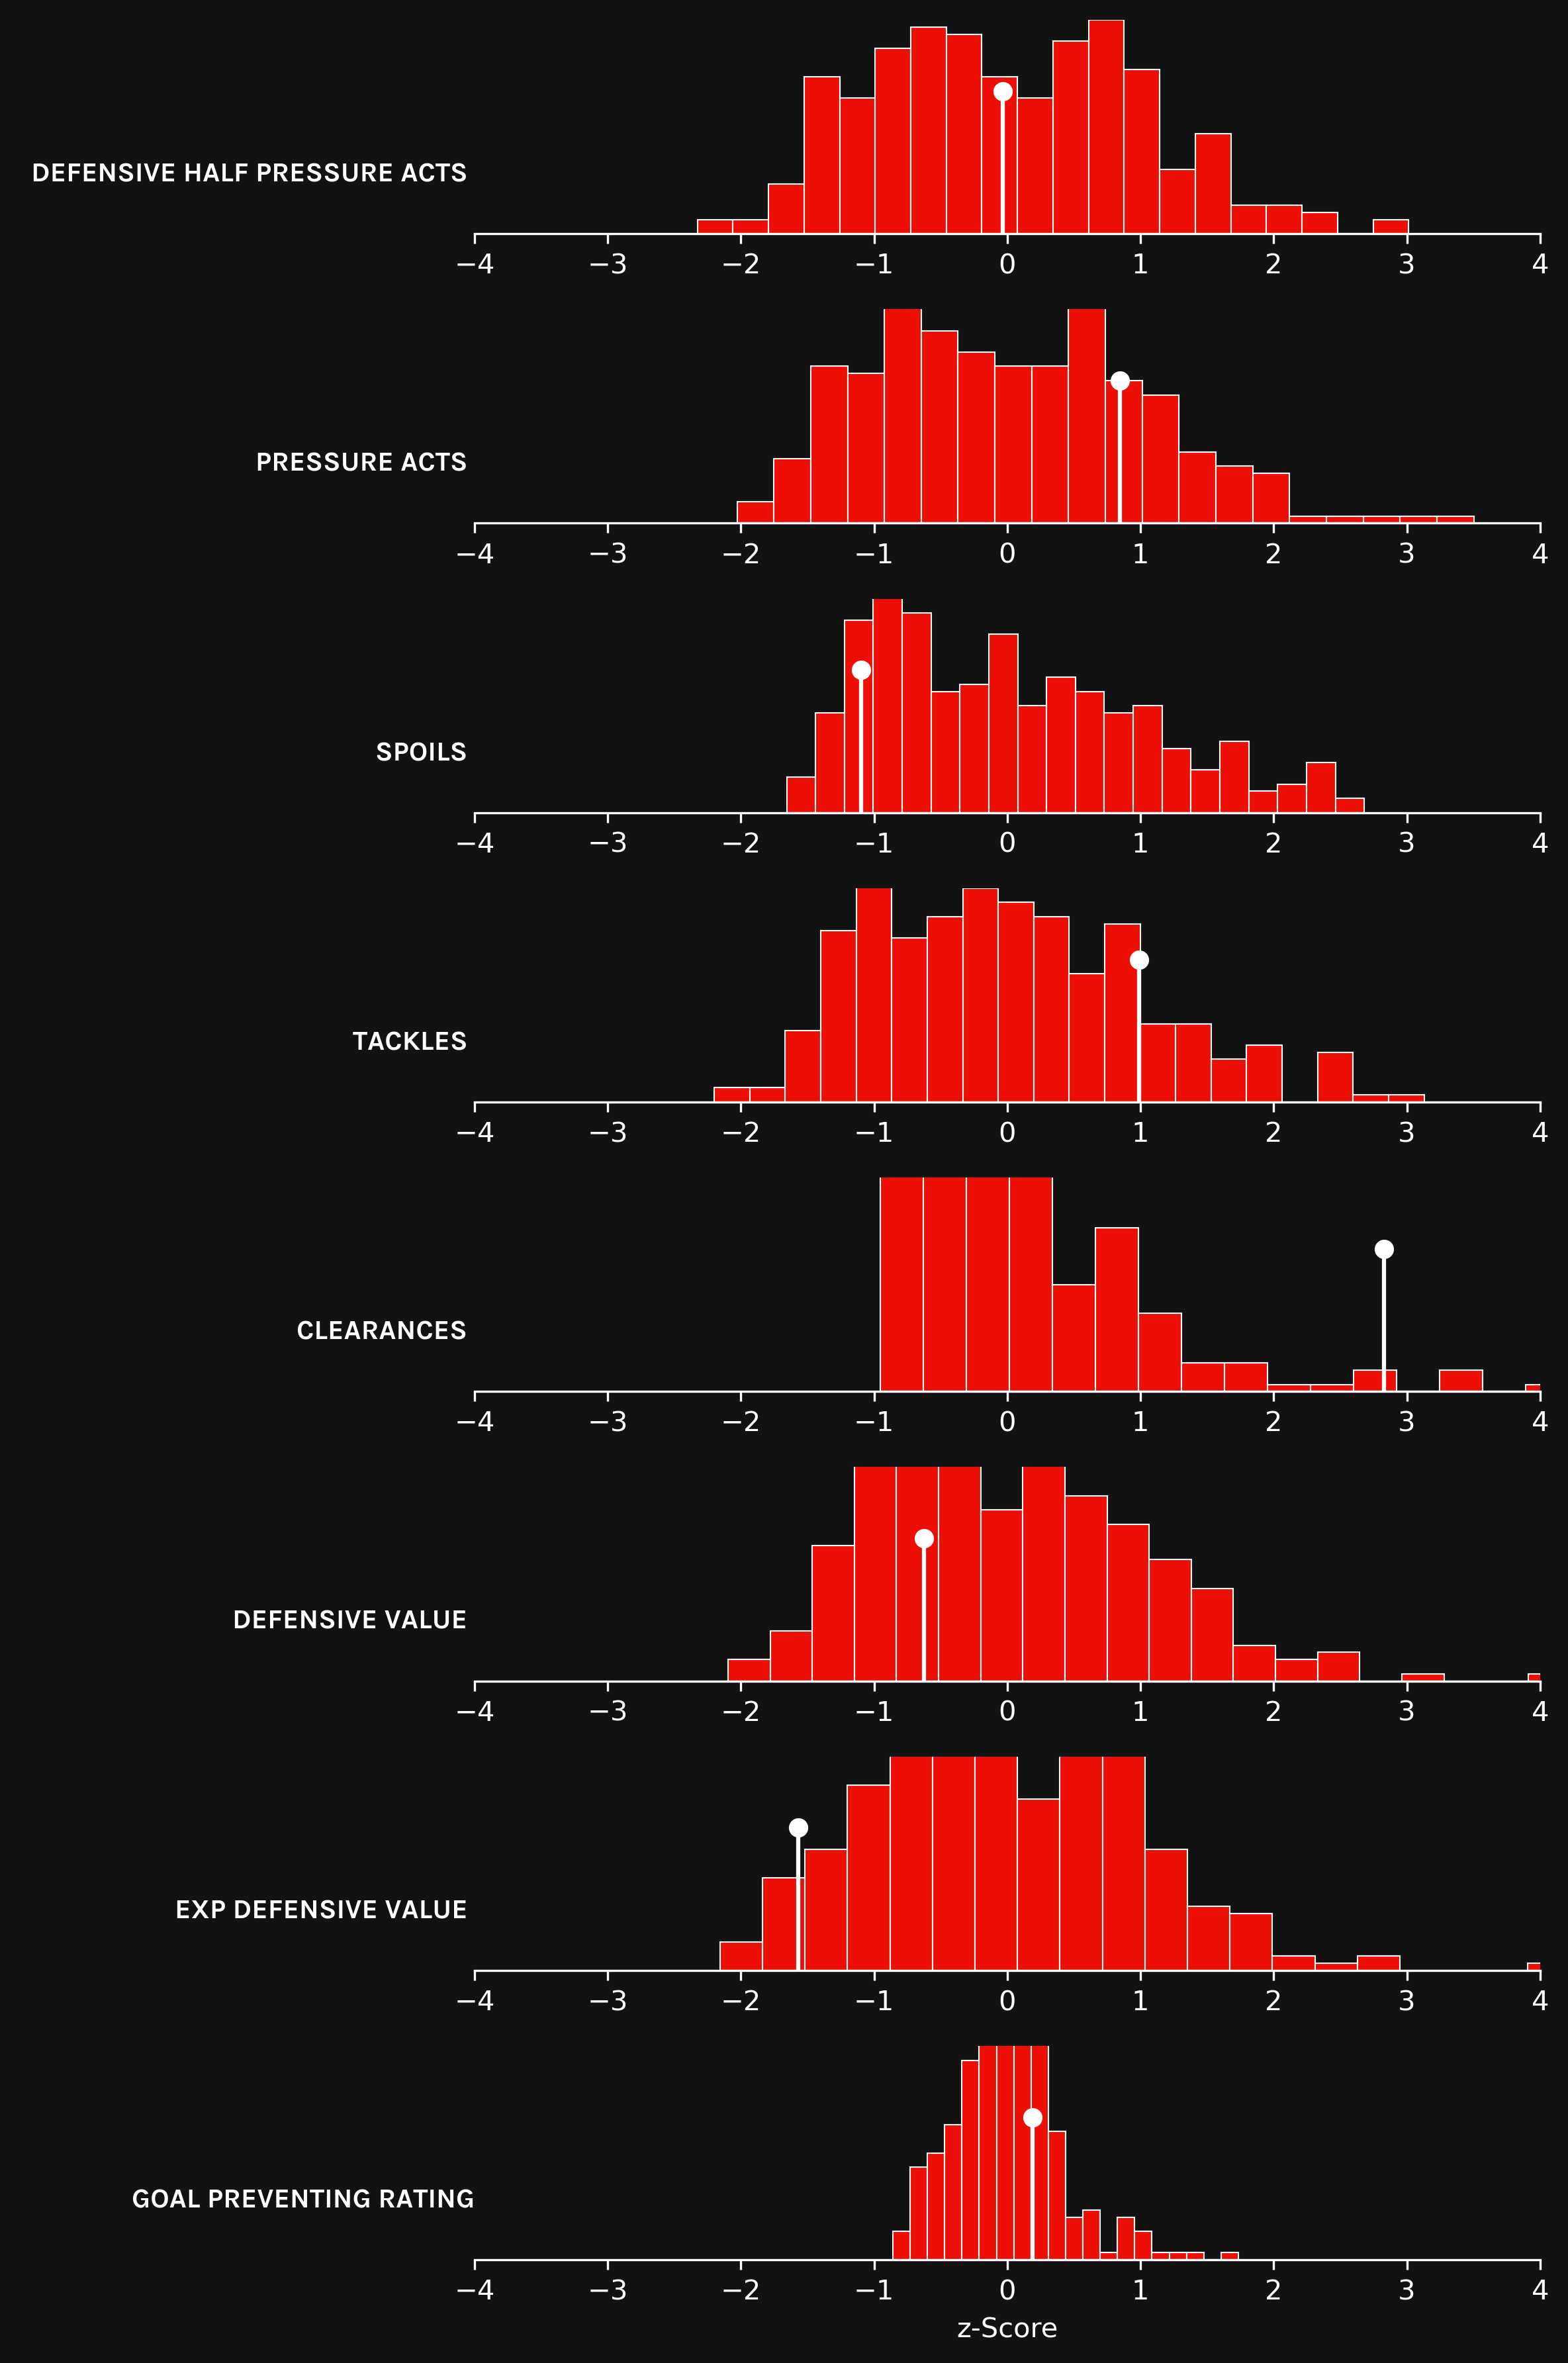

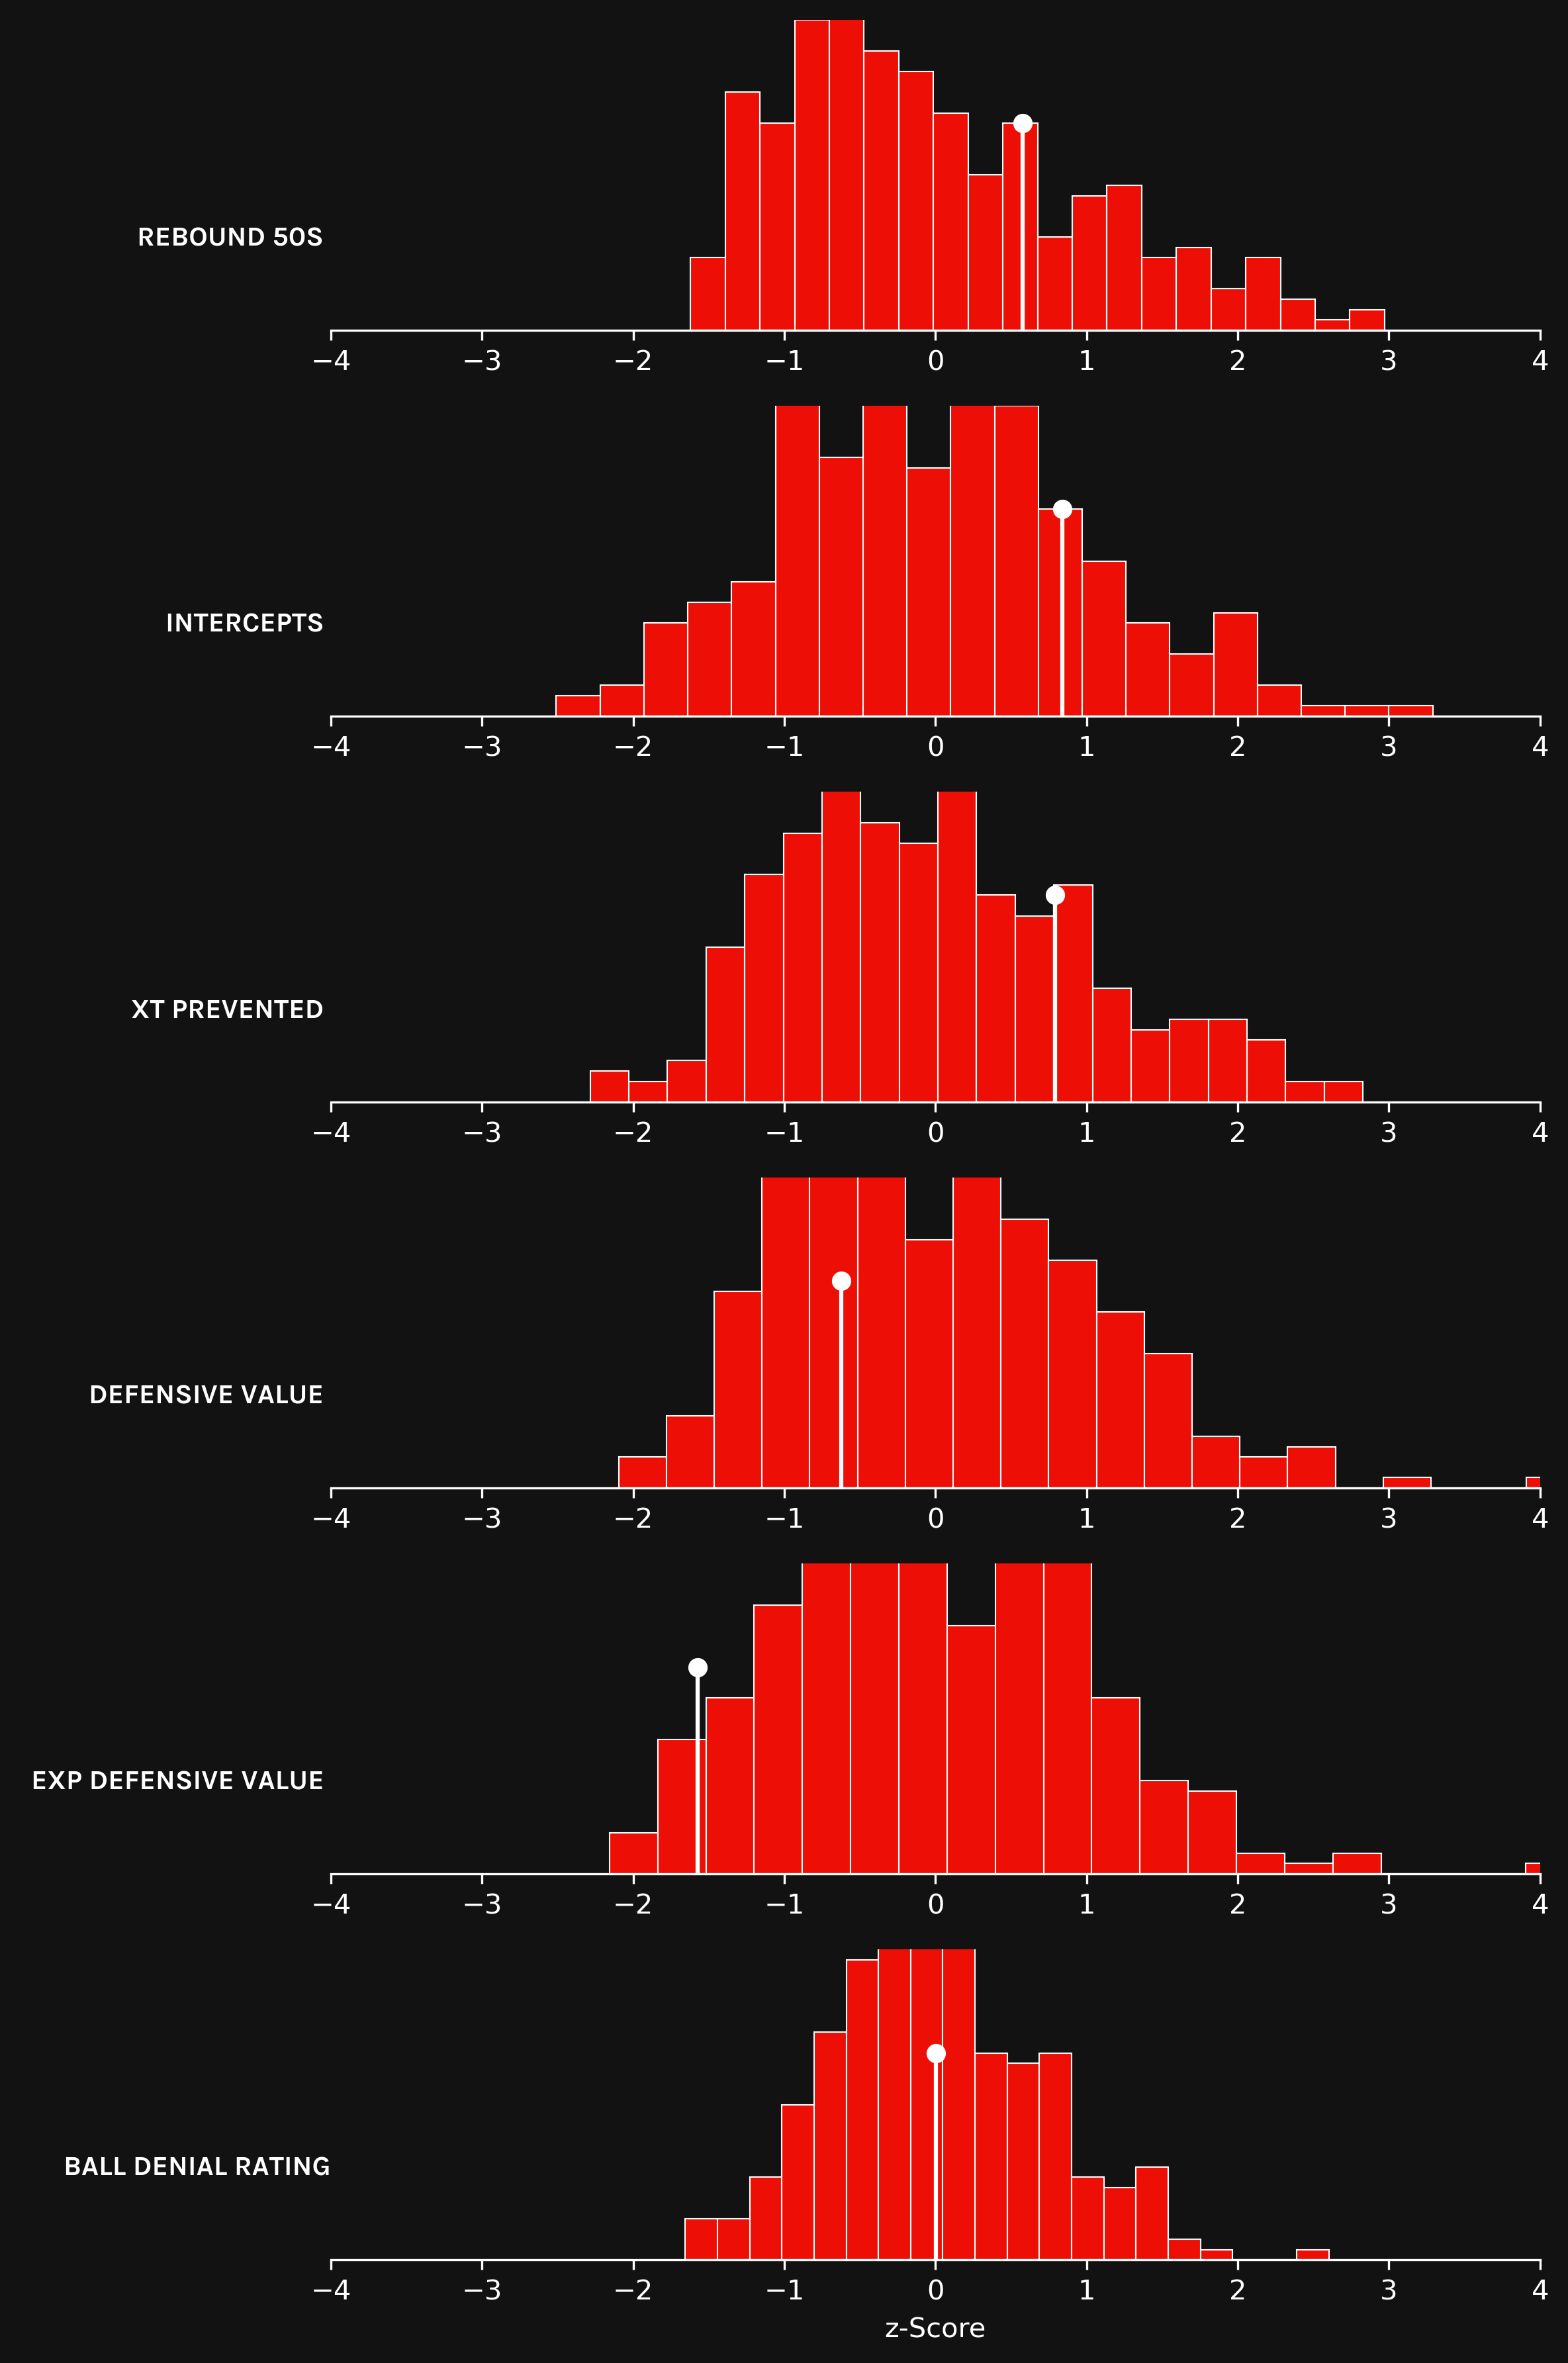

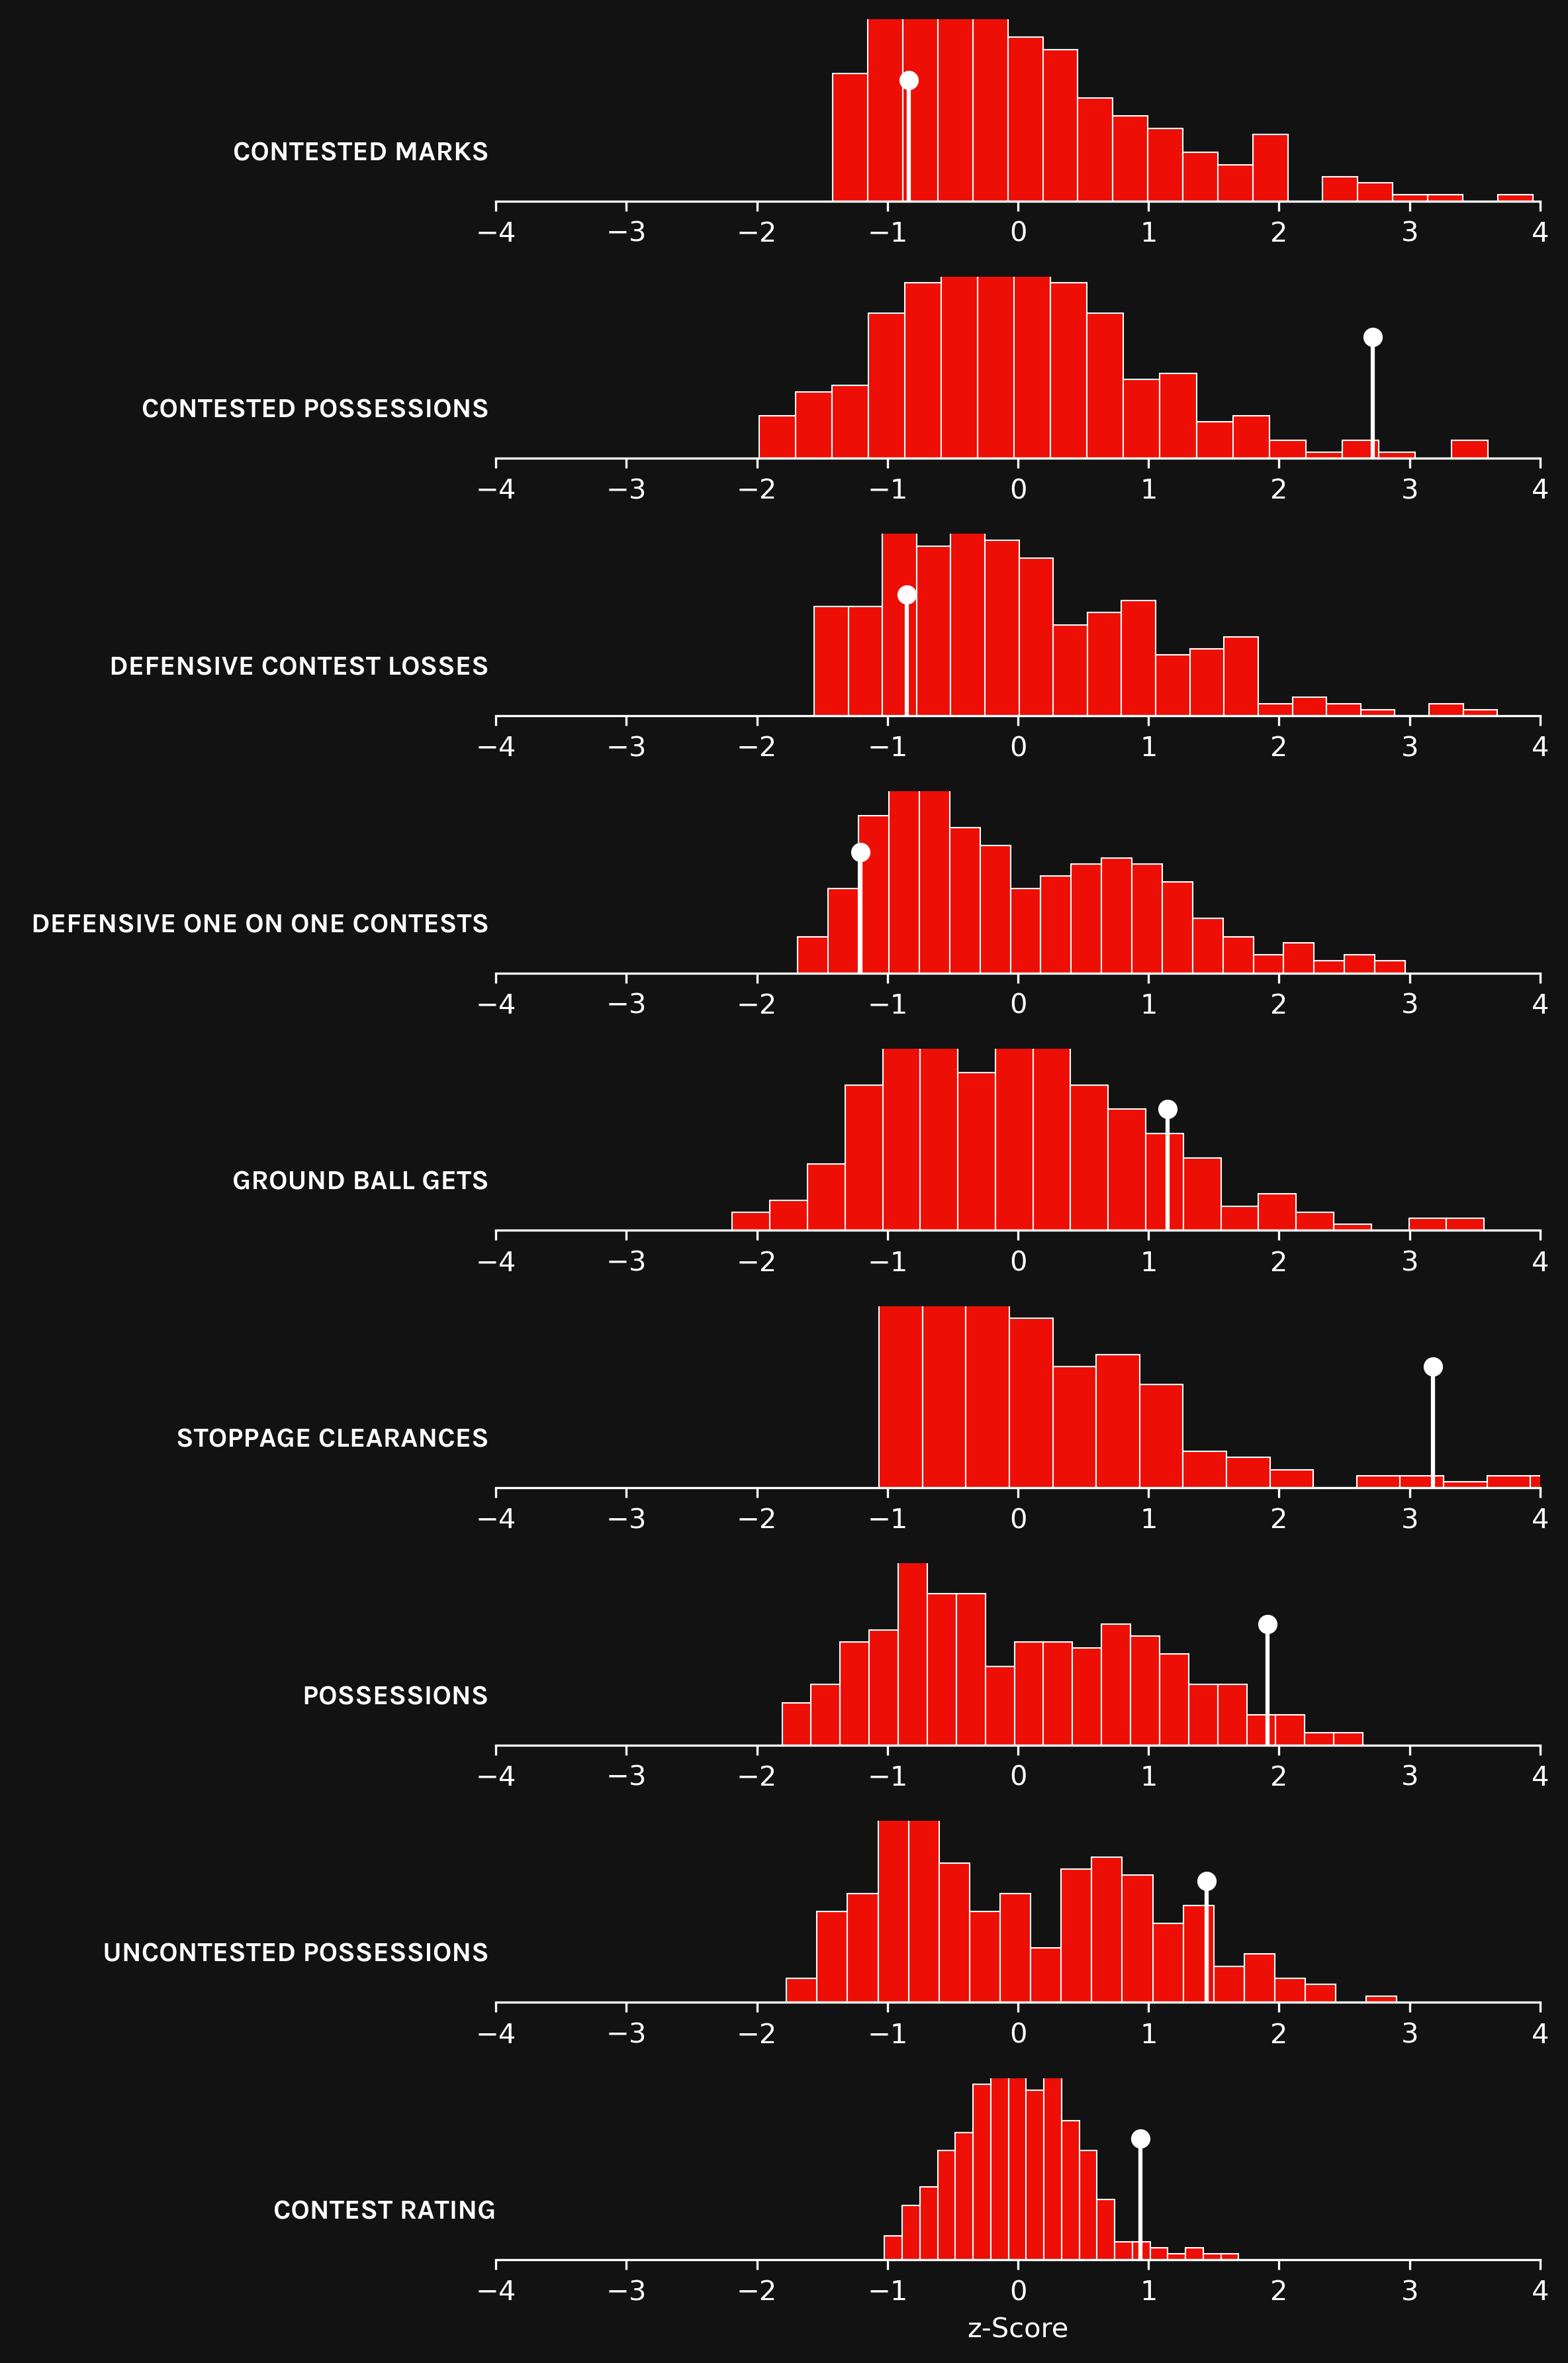

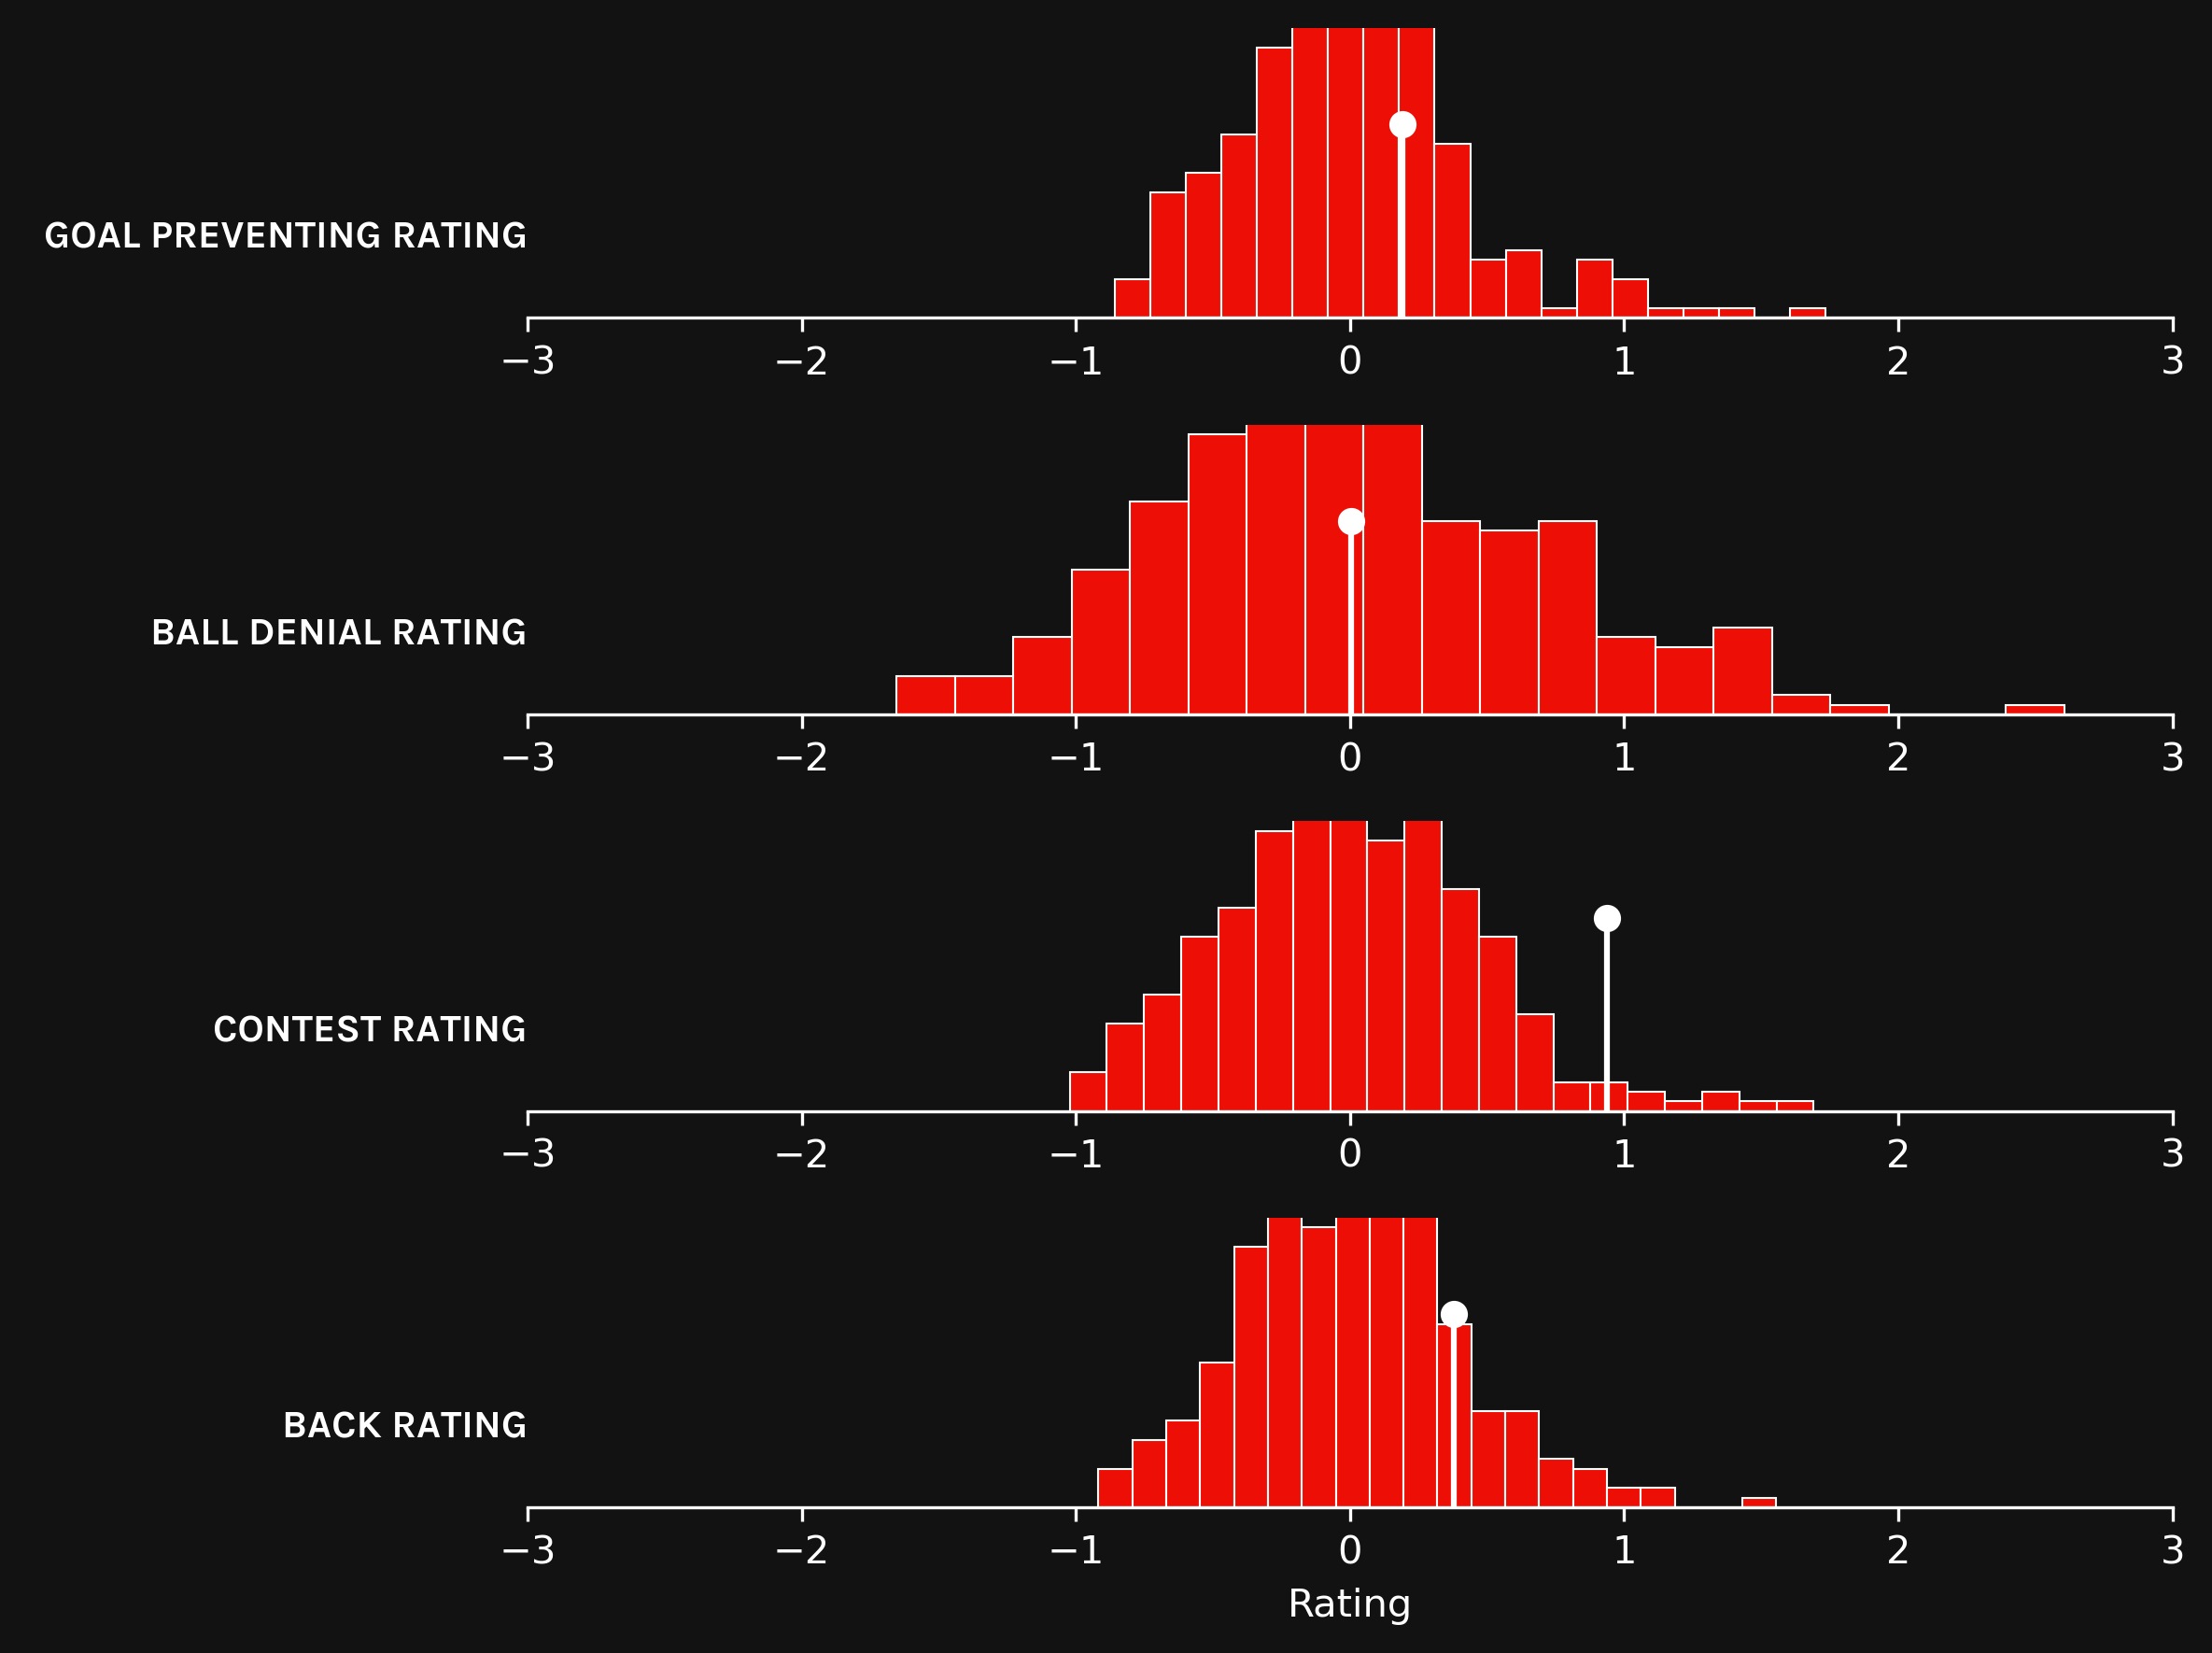

In [12]:
player = "Jack Sinclair"
team = "St Kilda"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    